
# Goodman ~~Spectroscopic~~ Pipeline - Short Overview

A tool to reduce data produced by the Goodman High Throughput Spectrograph (Goodman HTS)

Is a _Specific_ tool but we keep in mind generality.
<h2 color='red'>Feedback is welcome</h2>

![screenshot-2018-5-1 soar-telescope goodman](https://user-images.githubusercontent.com/3878895/39493287-513587dc-4d60-11e8-9bac-ab460307f41e.png)

* Simón Torres, Cesar Briceño, PhD., Bruno Quint, PhD., SOAR Telescope, La Serena, Chile.
  - e-mail: storres@ctio.noao.edu or goodman-pipeline@ctio.noao.edu
  - github: simontorres
  - twitter: @liftari (only for earthquakes or national emergencies)
  - 500px: simon48 (Pictures)

## Motivation

- Goodman HTS is the workhorse of SOAR  with  65% of available time in Sky.
- SOAR Telescope is looking forward to become an efficient follow up facility in LSST era.
- Users have relied on their own tools.
- We chose Pyhon because of Astropy

## Goals
- Easy to use
- Well documented
- Standard Coding
  - PEPs for Style and Docstrings (8, 257)
  - Unittest (Travis CI.)
  - Version Controlled (git+GitHub)
- Produce science-ready data
- Python Only (Astropy only?)
  - Use as much astropy packages as possible


## Features

- Two scripts: `redccd` and `redspec`
- Structured as one package with five subpackages.
  - No "sub-subpackages"
- Automatic
  - Data classification
  - Wavelength calibration
- In five minutes you can have a complete night fully reduced
  - From raw to wavelength calibrated



## Main problems

- Lack of initial planning
- Goodman HTS is a highly configurable instrument
  - Imaging and Spectroscopy
  - _Infinite_ possible spectroscopic configurations (20 predefined)
  - Two cameras. Initially headers were different... and they were not FITS compliant.
- Cosmic Ray Rejection 
  - LACosmic does not work well with spectroscopy. (not designed for)
  - Uses DCR, a C code written by Wojtek Pych.
  - Implemented as a subprocess.
  - DCR requires a parameter file. Reduces flexibility.
  - But it's worth it.

![cray_animation](https://user-images.githubusercontent.com/3878895/27358581-5cba700e-55e5-11e7-9cb6-be157f10c012.gif)

- WCS
  - Standard Wavelength Solution is not trivial
    - In particular non-linear solutions
  - Documentation is not clear (at least for me)


Linear Wavelength Solution (IRAF)

```
APNUM1  = 1 1 834.39 864.39              /                                                
WCSDIM  = 1                              /                                                
CTYPE1  = LINEAR                         /                                                
CRVAL1  = 3514.5662540243                /                                                
CRPIX1  = 1.0                            /                                                
CDELT1  = 0.653432383822811              /                                                
CD1_1   = 0.653432383822811              /                                                
LTM1_1  = 1.0                            /                                                
WAT0_001= system=equispec                /                                                
WAT1_001= wtype=linear label=Wavelength units=angstroms /                                                
DC-FLAG = 0                              /                                                
DCLOG1  = REFSPEC1 = axfc_0047.SO2016A-019_0320.0001 / 
```

Non-linear Wavelength Solution

```
BANDID1 = spectrum: background none, weights none, clean no /                                                
WCSDIM  = 2                              /                                                
CTYPE1  = MULTISPE                       /                                                
CDELT1  = 1.0                            /                                                
CD1_1   = 1.0                            /                                                
LTM1_1  = 1.0                            /                                                
WAT0_001= system=multispec               /                                                
WAT1_001= wtype=multispec label=Wavelength units=angstroms /                                                

CTYPE2  = MULTISPE                       /                                                
CDELT2  = 1.0                            /                                                
CD2_2   = 1.0                            /                                                
LTM2_2  = 1.0                            /                                                
WAXMAP01= 1 0 0 0                        /                                                
WAT2_001= wtype=multispec spec1 = "1 1 2 1. 1.5114461210693 4096 0. 834.39 864 /                                                
WAT2_002= .39 1. 0. 1 3 1616.37 3259.98 5115.64008185559 535.515983711607 -0.7 /                                                
WAT2_003= 79265625182385"                /                                                
DCLOG1  = REFSPEC1 = axfc_0047.SO2016A-019_0320.0001 /         
```

The lines to decode are these:

```
WAT2_001= wtype=multispec spec1 = "1 1 2 1. 1.5114461210693 4096 0. 834.39 864 /                                                
WAT2_002= .39 1. 0. 1 3 1616.37 3259.98 5115.64008185559 535.515983711607 -0.7 /                                                
WAT2_003= 79265625182385" 
```

Almost one and a half years ago I was not able to decode and I had to move on (If only I continued five more minutes).

First I decided to linearize all data but it limited the accuracy of the wavelength solutions.

So I created... a "temporal" solution which would be invisible to the END user.

Goodman Pipeline's Custom Method (Only for reference lamps)
```
GSP_FUNC= Chebyshev1D                    / Mathematical model of non-linearized data      
GSP_ORDR= 3                              / Mathematical model order                       
GSP_NPIX= 4060                           / Number of Pixels                               
GSP_C000= 3015.832830689599              / Value of parameter c0                          
GSP_C001= 0.9928285627054155             / Value of parameter c1                          
GSP_C002= 1.30494707124976e-06           / Value of parameter c2                          
GSP_C003= -1.8787391660396e-10           / Value of parameter c3   
```

By the way. I keep a record of all detected lines in pixel and wavelength. So the model can be re-fitted if desired.

```
GSP_P001= 638.1086587248691              / Line location in pixel value                   
GSP_P002= 1036.107959102751              / Line location in pixel value                   
GSP_P003= 1349.229499543231              / Line location in pixel value                   
GSP_P004= 2457.898593598567              / Line location in pixel value                   
GSP_P005= 2769.590403321315              / Line location in pixel value                   
GSP_P006= 2790.723288712976              / Line location in pixel value                   
GSP_P007= 2853.714816090703              / Line location in pixel value                   
GSP_P008= 2946.743446635288              / Line location in pixel value                   
GSP_P009= 3077.903334148183              / Line location in pixel value                   
GSP_P010= 3099.830604462089              / Line location in pixel value                   
GSP_P011= 3147.322131886654              / Line location in pixel value                   
GSP_P012= 3272.527542231529              / Line location in pixel value                   
GSP_P013= 3341.456262282777              / Line location in pixel value                   
GSP_P014= 3390.746759355074              / Line location in pixel value                   
GSP_P015= 3410.206789116099              / Line location in pixel value                   
GSP_P016= 3516.426858745599              / Line location in pixel value                   
GSP_P017= 3543.02442964068               / Line location in pixel value                   
GSP_P018= 3610.072299803245              / Line location in pixel value                   
GSP_P019= 3691.044848699182              / Line location in pixel value                   
GSP_P020= 3730.669823926749              / Line location in pixel value                   
GSP_P021= 3947.624097878471              / Line location in pixel value                   
GSP_P022= 3984.340118862267              / Line location in pixel value                   
GSP_P023= 4052.84501393036               / Line location in pixel value                   
GSP_A001= 3650.158                       / Line location in angstrom value                
GSP_A002= 4046.565                       / Line location in angstrom value                
GSP_A003= 4358.335                       / Line location in angstrom value                
GSP_A004= 5460.75                        / Line location in angstrom value                
GSP_A005= 5769.61                        / Line location in angstrom value                
GSP_A006= 5790.67                        / Line location in angstrom value                
GSP_A007= 5852.4879                      / Line location in angstrom value                
GSP_A008= 5944.8342                      / Line location in angstrom value                
GSP_A009= 6074.3377                      / Line location in angstrom value                
GSP_A010= 6096.1631                      / Line location in angstrom value                
GSP_A011= 6143.0626                      / Line location in angstrom value                
GSP_A012= 6266.495                       / Line location in angstrom value                
GSP_A013= 6334.4278                      / Line location in angstrom value                
GSP_A014= 6382.9917                      / Line location in angstrom value                
GSP_A015= 6402.248                       / Line location in angstrom value                
GSP_A016= 6506.5281                      / Line location in angstrom value                
GSP_A017= 6532.8822                      / Line location in angstrom value                
GSP_A018= 6598.9529                      / Line location in angstrom value                
GSP_A019= 6678.2762                      / Line location in angstrom value                
GSP_A020= 6717.043                       / Line location in angstrom value                
GSP_A021= 6929.4673                      / Line location in angstrom value                
GSP_A022= 6965.431                       / Line location in angstrom value                
GSP_A023= 7032.4131                      / Line location in angstrom value 
```

## An Example:

In [1]:
import os
import sys
sys.path.append('/user/simon/development/soar/goodman')

from ccdproc import CCDData

# import goodman stuff
from pipeline.core import (read_fits, write_fits)
from pipeline.wcs import WCS

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [16,9]


>>> from astroplan import download_IERS_A
>>> download_IERS_A()
 [astroplan.utils]
[03:06:40PM][    INFO]: Starting Goodman HTS Pipeline Log
[03:06:40PM][    INFO]: Local Time    : 2018-05-01 15:06:40.235760
[03:06:40PM][    INFO]: Universal Time: 2018-05-01 18:06:40.236388


## Instantiate WCS

In [2]:
wcs = WCS()

## Read Linear Solution

[05:47:25PM][    INFO]: Reading Linear Solution


Model: Linear1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
      slope [1]    intercept [1]
    -------------- -------------
    0.653432383823 3514.56625402


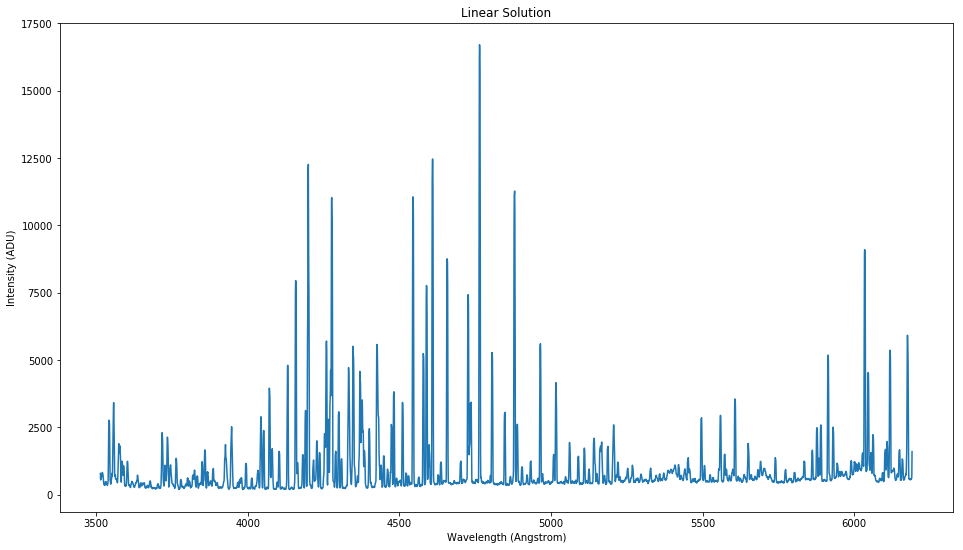

In [5]:
example_path = '/user/simon/development/soar/goodman/pipeline/data/test_data/wcs_data'

linear = 'linear_fits_solution.fits'

# wrapper for CCDData.read
linear_ccd = read_fits(os.path.join(example_path, linear))

wavelength, intensity = wcs.read(linear_ccd)

# missing data encapsulation
print(wcs.get_model())

plt.title('Linear Solution')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Intensity (ADU)')
plt.plot(wavelength, intensity)
plt.show()

## Read Non-Linear Solution

Model: Chebyshev1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Degree: 2
Parameters:
          c0            c1             c2      
    ------------- ------------- ---------------
    5115.64008186 535.515983712 -0.779265625182


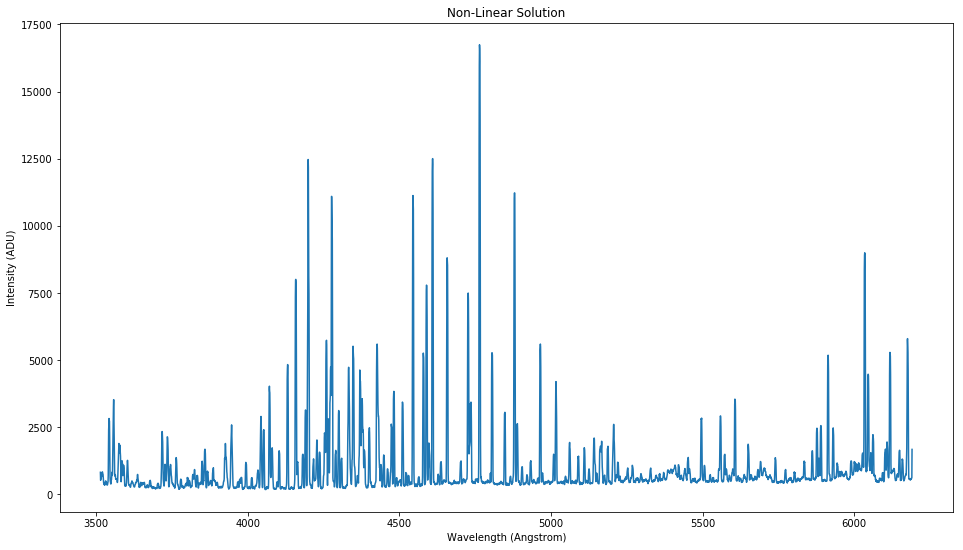

In [4]:
non_linear = os.path.join(example_path, 'non-linear_fits_solution_cheb.fits')

non_linear_ccd = read_fits(non_linear)

wavelength, intensity = wcs.read(non_linear_ccd)

print(wcs.get_model())

plt.title('Non-Linear Solution')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Intensity (ADU)')
plt.plot(wavelength, intensity)
plt.show()

## Missing parts
- log-linear solutions
- Linear Spline 
- Cubic Spline
- Does not write non-linear solutions

# Plans for the future

- Exposure time calculator
- Flux calibration subpackage
- Implement Optimal Extraction
- "Live" pipeline
  - Reduce data as it is obtained
  - Filesystem events triggered
  - Already working in some prototypes
- User Manual to readthedocs
  - Currently is a pdf file written reStructuredText
- Contribute to Astropy

# Takeways (for starters).
- Following standards is critical
- Finding the right tools is good
- Writting unittests is a must (we started late on this)
- Collaborations are very important